# Dados cartográficos com Python

Utilização o Geopandas e o Folium para aprofundar na análise exploratória geoespaciais. 

A principal característica do GeoPandas é a capacidade de lidar com geometrias (pontos, linhas, polígonos, etc.) em colunas especiais chamadas de `GeoSeries`. Essas geometrias podem ser usadas para representar entidades espaciais, como localizações geográficas, fronteiras de cidades, ou trajetórias. Cada linha de um `GeoDataFrame`—a versão geoespacial do `DataFrame` no Pandas—pode conter uma geometria associada a outros atributos, permitindo que se façam análises espaciais sobre os dados.

Using Geopandas and Folium to deepen exploratory geospatial analysis.

The main feature of GeoPandas is its ability to handle geometries (points, lines, polygons, etc.) in special columns called `GeoSeries`. These geometries can be used to represent spatial entities, such as geographic locations, city boundaries, or trajectories. Each row of a `GeoDataFrame`—the geospatial version of the `DataFrame` in Pandas—can contain a geometry associated with other attributes, allowing spatial analysis to be performed on the data.

https://geopandas.org/en/stable/index.html
https://python-visualization.github.io/folium/latest/#

In [5]:
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from folium import plugins
from shapely.geometry import Point

from src.config import DADOS_LIMPOS, DADOS_GEO_MEDIAN, DADOS_GEO_ORIGINAIS
from src.graficos import SCATTER_ALPHA, PALETTE

sns.set_theme(style="white", palette="bright")

In [2]:
df = pd.read_parquet(DADOS_LIMPOS)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.230003,37.880001,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,2.555556,0.146591
1,-122.220001,37.860001,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,2.109842,0.155797
2,-122.260002,37.840000,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2,4.294117,2.026891,0.260274
3,-122.260002,37.849998,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY,2,4.242424,2.640152,0.252679
4,-122.260002,37.840000,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY,2,5.343676,2.362768,0.203216


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17564 entries, 0 to 17563
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 17564 non-null  float64
 1   latitude                  17564 non-null  float64
 2   housing_median_age        17564 non-null  float64
 3   total_rooms               17564 non-null  float64
 4   total_bedrooms            17564 non-null  float64
 5   population                17564 non-null  float64
 6   households                17564 non-null  float64
 7   median_income             17564 non-null  float64
 8   median_house_value        17564 non-null  float64
 9   ocean_proximity           17564 non-null  object 
 10  median_income_cat         17564 non-null  int64  
 11  rooms_per_household       17564 non-null  float64
 12  population_per_household  17564 non-null  float64
 13  bedrooms_per_room         17564 non-null  float64
dtypes: flo

O melhor termo para traduzir **"county"** seria **"condado"**. Embora o Brasil não tenha uma divisão administrativa exata equivalente aos condados dos Estados Unidos, "condado" é uma tradução apropriada e amplamente compreendida.

Nos EUA, os **counties** (condados) são subdivisões dos estados, com certa autonomia administrativa, similar às regiões intermediárias entre estados e municípios no Brasil. No entanto, a melhor correspondência prática no Brasil, considerando a divisão político-administrativa, seria com os **municípios**, que são as subdivisões administrativas dos estados brasileiros, apesar de suas diferenças em termos de autonomia e funções.

The best term to translate **"county"** would be **"condado"**. Although Brazil does not have an exact administrative division equivalent to the counties in the United States, "condado" is an appropriate and widely understood translation.

In the United States, **counties** are subdivisions of the states, with a certain administrative autonomy, similar to the intermediate regions between states and municipalities in Brazil. However, the best practical correspondence in Brazil, considering the political-administrative division, would be with **municipalities**, which are the administrative subdivisions of the Brazilian states, despite their differences in terms of autonomy and functions.



Definição das áreas dos condados

Definition of county areas

In [4]:
gdf_calif_counties = gpd.read_file(DADOS_GEO_ORIGINAIS)
gdf_calif_counties.head()

,name,fullname,abbrev,abcode,ansi,geometry
0,Siskiyou,Siskiyou County,SIS,c047,093,"POLYGON ((-121.44597 41.18390, -121.46238 41.1..."
1,Del Norte,Del Norte County,DNT,c008,015,"MULTIPOLYGON (((-124.19097 41.73619, -124.1933..."
2,Modoc,Modoc County,MOD,c025,049,"POLYGON ((-121.44784 41.99739, -121.42322 41.9..."
3,Trinity,Trinity County,TRI,c053,105,"POLYGON ((-122.66795 40.77637, -122.66814 40.7..."
4,Shasta,Shasta County,SHA,c045,089,"POLYGON ((-122.17328 40.37906, -122.17359 40.3..."


In [5]:
pontos = [Point(long, lat) for long, lat in zip(df['longitude'], df['latitude'])]
#uso de points para converter as medidas geométricas
#use of points to convert geometric measurements

pontos[:5]

[<POINT (-122 37.9)>,
 <POINT (-122 37.9)>,
 <POINT (-122 37.8)>,
 <POINT (-122 37.8)>,
 <POINT (-122 37.8)>]

In [6]:
gdf = gpd.GeoDataFrame(df, geometry=pontos)

In [7]:
gdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room,geometry
0,-122.230003,37.880001,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,2.555556,0.146591,POINT (-122.23000 37.88000)
1,-122.220001,37.860001,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5,6.238137,2.109842,0.155797,POINT (-122.22000 37.86000)
2,-122.260002,37.840000,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,2,4.294117,2.026891,0.260274,POINT (-122.26000 37.84000)
3,-122.260002,37.849998,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY,2,4.242424,2.640152,0.252679,POINT (-122.26000 37.85000)
4,-122.260002,37.840000,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY,2,5.343676,2.362768,0.203216,POINT (-122.26000 37.84000)


In [8]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17564 entries, 0 to 17563
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17564 non-null  float64 
 1   latitude                  17564 non-null  float64 
 2   housing_median_age        17564 non-null  float64 
 3   total_rooms               17564 non-null  float64 
 4   total_bedrooms            17564 non-null  float64 
 5   population                17564 non-null  float64 
 6   households                17564 non-null  float64 
 7   median_income             17564 non-null  float64 
 8   median_house_value        17564 non-null  float64 
 9   ocean_proximity           17564 non-null  object  
 10  median_income_cat         17564 non-null  int64   
 11  rooms_per_household       17564 non-null  float64 
 12  population_per_household  17564 non-null  float64 
 13  bedrooms_per_room         17564 non-nu

In [9]:
#conversão da longitude e latidude no sistema de referência usado pelo geodataframe.
#conversion of longitude and latitude into the reference system used by the geodataframe.
gdf=gdf.set_crs(4326)



In [10]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
gdf_calif_counties.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
gdf_calif_counties.set_crs(4326)
gdf_calif_counties.head()

,name,fullname,abbrev,abcode,ansi,geometry
0,Siskiyou,Siskiyou County,SIS,c047,093,"POLYGON ((-121.44597 41.18390, -121.46238 41.1..."
1,Del Norte,Del Norte County,DNT,c008,015,"MULTIPOLYGON (((-124.19097 41.73619, -124.1933..."
2,Modoc,Modoc County,MOD,c025,049,"POLYGON ((-121.44784 41.99739, -121.42322 41.9..."
3,Trinity,Trinity County,TRI,c053,105,"POLYGON ((-122.66795 40.77637, -122.66814 40.7..."
4,Shasta,Shasta County,SHA,c045,089,"POLYGON ((-122.17328 40.37906, -122.17359 40.3..."


In [13]:
#juntar os dois gdfs para poder associar cada ponto do arquivo original ao condado a qual pertence
# merge the two gdfs to be able to associate each point in the original file with the county to which it belongs
gdf_joined = gpd.sjoin(gdf, gdf_calif_counties, how='left', predicate='within')
gdf_joined.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,...,rooms_per_household,population_per_household,bedrooms_per_room,geometry,index_right,name,fullname,abbrev,abcode,ansi
0,-122.230003,37.880001,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,...,6.984127,2.555556,0.146591,POINT (-122.23000 37.88000),34.0,Alameda,Alameda County,ALA,c001,001
1,-122.220001,37.860001,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,...,6.238137,2.109842,0.155797,POINT (-122.22000 37.86000),34.0,Alameda,Alameda County,ALA,c001,001
2,-122.260002,37.840000,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,...,4.294117,2.026891,0.260274,POINT (-122.26000 37.84000),34.0,Alameda,Alameda County,ALA,c001,001
3,-122.260002,37.849998,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY,...,4.242424,2.640152,0.252679,POINT (-122.26000 37.85000),34.0,Alameda,Alameda County,ALA,c001,001
4,-122.260002,37.840000,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,NEAR BAY,...,5.343676,2.362768,0.203216,POINT (-122.26000 37.84000),34.0,Alameda,Alameda County,ALA,c001,001


In [14]:
gdf_calif_counties.iloc[34]

name                                                  Alameda
fullname                                       Alameda County
abbrev                                                    ALA
abcode                                                   c001
ansi                                                      001
geometry    POLYGON ((-121.5568067779202 37.81632460192168...
Name: 34, dtype: object

In [15]:
gdf_joined=gdf_joined.drop(
    columns=['index_right', 'fullname', 'abcode', 'ansi']
)
gdf_joined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 17564 entries, 0 to 17563
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 17564 non-null  float64 
 1   latitude                  17564 non-null  float64 
 2   housing_median_age        17564 non-null  float64 
 3   total_rooms               17564 non-null  float64 
 4   total_bedrooms            17564 non-null  float64 
 5   population                17564 non-null  float64 
 6   households                17564 non-null  float64 
 7   median_income             17564 non-null  float64 
 8   median_house_value        17564 non-null  float64 
 9   ocean_proximity           17564 non-null  object  
 10  median_income_cat         17564 non-null  int64   
 11  rooms_per_household       17564 non-null  float64 
 12  population_per_household  17564 non-null  float64 
 13  bedrooms_per_room         17564 non-null  f

In [16]:
gdf_joined.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
median_income_cat             0
rooms_per_household           0
population_per_household      0
bedrooms_per_room             0
geometry                      0
name                        148
abbrev                      148
dtype: int64

In [17]:
gdf_joined[gdf_joined.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room,geometry,name,abbrev
1507,-124.300003,41.799999,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,NEAR OCEAN,2,5.589958,2.715481,0.206587,POINT (-124.30000 41.80000),NaN,NaN
1508,-124.230003,41.750000,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0,NEAR OCEAN,2,6.594990,2.803758,0.194998,POINT (-124.23000 41.75000),NaN,NaN
1511,-124.220001,41.730000,28.0,3003.0,699.0,1530.0,653.0,1.7038,78300.0,NEAR OCEAN,2,4.598775,2.343032,0.232767,POINT (-124.22000 41.73000),NaN,NaN
1517,-124.300003,41.840000,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,NEAR OCEAN,3,5.870614,2.728070,0.198356,POINT (-124.30000 41.84000),NaN,NaN
1521,-119.940002,38.959999,20.0,1451.0,386.0,467.0,255.0,1.5536,212500.0,INLAND,2,5.690196,1.831372,0.266023,POINT (-119.94000 38.96000),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17198,-119.300003,34.270000,17.0,1527.0,503.0,688.0,423.0,1.6007,187500.0,NEAR OCEAN,2,3.609929,1.626478,0.329404,POINT (-119.30000 34.27000),NaN,NaN
17199,-119.290001,34.259998,32.0,3295.0,764.0,1344.0,600.0,3.6007,395500.0,NEAR OCEAN,3,5.491667,2.240000,0.231866,POINT (-119.29000 34.26000),NaN,NaN
17201,-119.290001,34.230000,22.0,2486.0,608.0,709.0,523.0,2.9018,275000.0,NEAR OCEAN,2,4.753346,1.355641,0.244570,POINT (-119.29000 34.23000),NaN,NaN
17232,-119.230003,34.150002,18.0,6213.0,1188.0,2679.0,1000.0,3.7480,380400.0,NEAR OCEAN,3,6.213000,2.679000,0.191212,POINT (-119.23000 34.15000),NaN,NaN


In [18]:
#alguns pontos parecem indicar localidades no meio do oceano.
#some points seem to indicate locations in the middle of the ocean.
linhas_faltantes = gdf_joined[gdf_joined.isnull().any(axis=1)].index
linhas_faltantes

Index([ 1507,  1508,  1511,  1517,  1521,  2154,  2193,  2201,  2203,  2219,
       ...
       15747, 15748, 15752, 15755, 15756, 17198, 17199, 17201, 17232, 17258],
      dtype='int64', length=148)

Para achar o condado mais próximo,tenho que definiro ponto que será referência.
Mesmo para áreas irregulares, como fronteiras naturais ou regiões com formatos complexos, o centroide ainda é o ponto médio calculado geometricamente.


235 / 5.000
To find the nearest county, I have to define the point that will be the reference.
Even for irregular areas, such as natural boundaries or regions with complex shapes, the centroid is still the geometrically calculated midpoint.

In [19]:
gdf_calif_counties["centroid"] = gdf_calif_counties.to_crs(3310).centroid.to_crs(4326)
gdf_calif_counties.head()

,name,fullname,abbrev,abcode,ansi,geometry,centroid
0,Siskiyou,Siskiyou County,SIS,c047,093,"POLYGON ((-121.44597 41.18390, -121.46238 41.1...",POINT (-122.54050 41.59333)
1,Del Norte,Del Norte County,DNT,c008,015,"MULTIPOLYGON (((-124.19097 41.73619, -124.1933...",POINT (-123.89671 41.74266)
2,Modoc,Modoc County,MOD,c025,049,"POLYGON ((-121.44784 41.99739, -121.42322 41.9...",POINT (-120.72515 41.58970)
3,Trinity,Trinity County,TRI,c053,105,"POLYGON ((-122.66795 40.77637, -122.66814 40.7...",POINT (-123.11400 40.64908)
4,Shasta,Shasta County,SHA,c045,089,"POLYGON ((-122.17328 40.37906, -122.17359 40.3...",POINT (-122.04098 40.76333)


In [20]:
gdf_calif_counties.shape


(58, 7)

In [31]:
#retornar o centroid com a menor distância
#return the centroid with the smallest distance
gdf_calif_counties['centroid'].to_crs(3310).distance(gdf_joined.to_crs(3310).loc[1507,'geometry']).idxmin()


1

In [27]:
distancias = gdf_calif_counties['centroid'].to_crs(3310).distance(gdf_joined.loc[1507,'geometry']).idxmin()
dis

In [36]:
def condado_mais_próximo(linha):
    ponto= linha['geometry']
    distancias = gdf_calif_counties['centroid'].to_crs(3310).distance(gdf_joined.to_crs(3310).loc[1507,'geometry'])
    idx_condado_mais_proximo = distancias.idxmin()
    condado_mais_proximo = gdf_calif_counties.loc[idx_condado_mais_proximo]
    return condado_mais_proximo[['name', 'abbrev']]


In [37]:
#aplicar a função a todas as linhas
##apply the function to all rows
gdf_joined.loc[linhas_faltantes, ['name', 'abbrev']] = gdf_joined.loc[linhas_faltantes].apply(condado_mais_próximo, axis=1)

In [38]:
gdf_calif_counties = gdf_calif_counties.to_crs(epsg = 4326)
gdf = gdf.to_crs(epsg = 4326)
gdf_joined = gdf_joined.to_crs(epsg = 4326)
gdf_calif_counties.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
gdf_joined.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
median_income_cat           0
rooms_per_household         0
population_per_household    0
bedrooms_per_room           0
geometry                    0
name                        0
abbrev                      0
dtype: int64

In [40]:
gdf_joined.loc[linhas_faltantes, ['name' ,'abbrev']].value_counts()

name       abbrev
Del Norte  DNT       148
Name: count, dtype: int64

In [41]:
gdf_joined['name'].value_counts()

name
Los Angeles        4821
San Diego          1438
Orange             1411
Santa Clara         824
Alameda             737
San Bernardino      729
Sacramento          622
Contra Costa        558
Riverside           504
Fresno              491
San Joaquin         387
Kern                353
San Mateo           334
Ventura             334
Sonoma              293
Stanislaus          282
Santa Barbara       248
Tulare              246
San Francisco       202
Solano              178
Santa Cruz          166
Monterey            166
Del Norte           159
Butte               144
Merced              123
Marin               122
Shasta              119
San Luis Obispo     118
Imperial            115
Humboldt            104
El Dorado           101
Placer              101
Napa                 94
Kings                86
Lake                 81
Nevada               80
Madera               74
Yolo                 74
Mendocino            72
Sutter               56
Yuba                 51
Tehama     

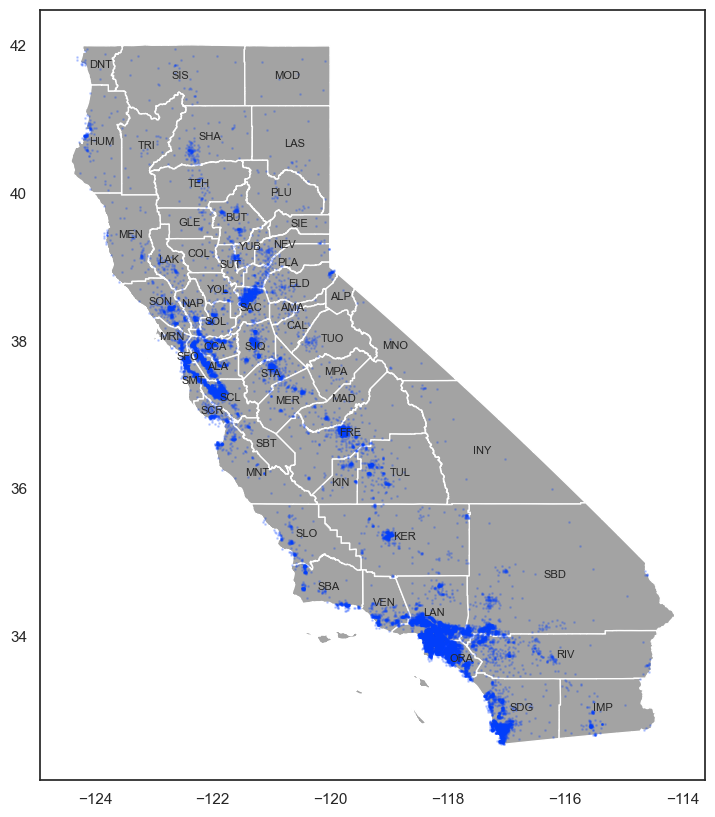

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf_calif_counties.plot(
    ax=ax,
    color='C7'
    
)

ax.scatter(
    gdf_joined['longitude'],
    gdf_joined['latitude'],
    s=1,
    color='C10',
    alpha=SCATTER_ALPHA,
    
)

for x,y, abbrev in zip(gdf_calif_counties['centroid'].x,  gdf_calif_counties['centroid'].y,  gdf_calif_counties['abbrev']):
    ax.text(x,y, abbrev, ha='center', va='center', fontsize=8)
   
plt.show()

In [43]:
gdf_joined.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
count,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000,17564.000000
mean,-119.509985,35.602202,27.276873,2510.510875,515.378046,1386.315019,483.979447,3.696602,189570.803803,2.952460,5.253924,2.934664,0.211643
std,1.984251,2.147238,11.323957,1593.977891,320.848886,844.889138,295.559700,1.541926,95971.413796,1.006761,1.134086,0.691409,0.048315
min,-124.300003,32.540001,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.000000,1.714286,0.750000,0.113535
25%,-121.599998,33.919998,18.000000,1464.750000,300.000000,816.000000,287.000000,2.547375,114300.000000,2.000000,4.446466,2.470259,0.176919
50%,-118.459999,34.240002,28.000000,2131.000000,438.000000,1196.000000,415.000000,3.479200,171400.000000,3.000000,5.205450,2.852657,0.203465
75%,-117.980003,37.669998,36.000000,3124.000000,643.000000,1738.000000,605.000000,4.622525,243800.000000,4.000000,5.961016,3.306427,0.239151
max,-114.550003,41.950001,51.000000,11026.000000,2205.000000,5804.000000,1979.000000,10.594100,500000.000000,5.000000,10.352942,5.392954,0.406295


In [44]:
#acrescentar valores medianos de cada condado
#add median values ​​for each county
gdf_joined.groupby('name').median(numeric_only=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
name,,,,,,,,,,,,,
Alameda,-122.129997,37.709999,35.0,1938.0,399.0,1039.0,382.0,3.57140,188600.0,3.0,5.075716,2.719877,0.207107
Alpine,-119.779999,38.689999,17.0,1364.0,282.0,338.0,152.0,2.45000,117600.0,2.0,8.973684,2.223684,0.206745
Amador,-120.720001,38.430000,17.0,1787.0,357.0,767.0,305.0,3.04650,116700.0,3.0,6.058824,2.435115,0.191900
Butte,-121.599998,39.709999,22.0,1875.0,372.5,936.5,356.5,2.31895,86450.0,2.0,5.308163,2.514830,0.199470
Calaveras,-120.559998,38.200001,17.0,2745.0,559.0,1061.0,459.0,2.56670,101600.0,2.0,5.994983,2.488000,0.204878
Colusa,-122.045002,39.180000,34.0,1497.0,309.0,665.0,265.0,2.50920,68950.0,2.0,5.468055,2.895284,0.204971
Contra Costa,-122.070000,37.950001,27.0,2399.5,439.5,1143.0,425.5,4.37500,184950.0,3.0,5.677517,2.716802,0.184961
Del Norte,-119.739998,34.389999,25.0,2059.0,503.0,920.0,420.0,3.54690,300000.0,3.0,5.263926,2.247863,0.219638
El Dorado,-120.709999,38.759998,17.0,2259.0,459.0,916.0,351.0,3.15000,128300.0,3.0,6.183511,2.676471,0.195695


In [45]:
gdf_calif_counties.head()

,name,fullname,abbrev,abcode,ansi,geometry,centroid
0,Siskiyou,Siskiyou County,SIS,c047,093,"POLYGON ((-121.44597 41.18390, -121.46238 41.1...",POINT (-122.54050 41.59333)
1,Del Norte,Del Norte County,DNT,c008,015,"MULTIPOLYGON (((-124.19097 41.73619, -124.1933...",POINT (-123.89671 41.74266)
2,Modoc,Modoc County,MOD,c025,049,"POLYGON ((-121.44784 41.99739, -121.42322 41.9...",POINT (-120.72515 41.58970)
3,Trinity,Trinity County,TRI,c053,105,"POLYGON ((-122.66795 40.77637, -122.66814 40.7...",POINT (-123.11400 40.64908)
4,Shasta,Shasta County,SHA,c045,089,"POLYGON ((-122.17328 40.37906, -122.17359 40.3...",POINT (-122.04098 40.76333)


In [46]:
gdf_calif_counties = gdf_calif_counties.merge(
    gdf_joined.groupby('name').median(numeric_only=True),
    left_on='name',
    right_index=True,
)
    

In [47]:
gdf_calif_counties.head()

,name,fullname,abbrev,abcode,ansi,geometry,centroid,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room
0,Siskiyou,Siskiyou County,SIS,c047,093,"POLYGON ((-121.44597 41.18390, -121.46238 41.1...",POINT (-122.54050 41.59333),-122.544998,41.615000,23.0,2372.0,482.0,1111.0,427.0,2.17525,63950.0,2.0,5.848729,2.534145,0.201014
1,Del Norte,Del Norte County,DNT,c008,015,"MULTIPOLYGON (((-124.19097 41.73619, -124.1933...",POINT (-123.89671 41.74266),-119.739998,34.389999,25.0,2059.0,503.0,920.0,420.0,3.54690,300000.0,3.0,5.263926,2.247863,0.219638
2,Modoc,Modoc County,MOD,c025,049,"POLYGON ((-121.44784 41.99739, -121.42322 41.9...",POINT (-120.72515 41.58970),-120.530003,41.575001,22.0,2472.0,473.5,860.5,349.5,2.18775,50250.0,2.0,6.891731,2.537227,0.197889
3,Trinity,Trinity County,TRI,c053,105,"POLYGON ((-122.66795 40.77637, -122.66814 40.7...",POINT (-123.11400 40.64908),-123.125000,40.639999,18.5,954.0,211.5,369.5,154.0,1.90705,77100.0,2.0,6.116148,2.541760,0.225996
4,Shasta,Shasta County,SHA,c045,089,"POLYGON ((-122.17328 40.37906, -122.17359 40.3...",POINT (-122.04098 40.76333),-122.349998,40.570000,19.0,2251.0,463.0,1077.0,412.0,2.40790,85200.0,2.0,5.487129,2.714097,0.198684


In [48]:
gdf_joined[['name', 'ocean_proximity']].groupby('name').describe()


ocean_proximity                         
                          count unique         top  freq
name                                                    
Alameda                     737      3    NEAR BAY   617
Alpine                        1      1      INLAND     1
Amador                       27      1      INLAND    27
Butte                       144      1      INLAND   144
Calaveras                    25      1      INLAND    25
Colusa                       14      1      INLAND    14
Contra Costa                558      3    NEAR BAY   379
Del Norte                   159      3  NEAR OCEAN   133
El Dorado                   101      1      INLAND   101
Fresno                      491      1      INLAND   491
Glenn                        26      1      INLAND    26
Humboldt                    104      3  NEAR OCEAN    73
Imperial                    115      1      INLAND   115
Inyo                         18      1      INLAND    18
Kern                        353      1      INLAND   353
Kings                        86      1      INLAND    86
Lake                         81      2      INLAND    75
Lassen                       19      1      INLAND    19
Los Angeles                4821      3   <1H OCEAN  4177
Madera                       74      1      INLAND    74
Marin                       122      3    NEAR BAY    98
Mariposa                     17      1      INLAND    17
Mendocino                    72      3   <1H OCEAN    58
Merced                      123      1      INLAND   123
Modoc                         8      1      INLAND     8
Mono                          8      1      INLAND     8
Monterey                    166      3   <1H OCEAN   126
Napa                         94      3    NEAR BAY    59
Nevada                       80      1      INLAND    80
Orange                     1411      2   <1H OCEAN  1374
Placer                      101      1      INLAND   101
Plumas                       23      1      INLAND    23
Riverside                   504      2      INLAND   461
Sacramento                  622      1      INLAND   622
San Benito                   26      2      INLAND    25
San Bernardino              729      2      INLAND   725
San Diego                  1438      3  NEAR OCEAN   911
San Francisco               202      2    NEAR BAY   140
San Joaquin                 387      1      INLAND   387
San Luis Obispo             118      3   <1H OCEAN    67
San Mateo                   334      2  NEAR OCEAN   268
Santa Barbara               248      2  NEAR OCEAN   131
Santa Clara                 824      4   <1H OCEAN   724
Santa Cruz                  166      2  NEAR OCEAN   119
Shasta                      119      1      INLAND   119
Sierra                        5      1      INLAND     5
Siskiyou                     34      1      INLAND    34
Solano                      178      2      INLAND   115
Sonoma                      293      3   <1H OCEAN   273
Stanislaus                  282      1      INLAND   282
Sutter                       56      1      INLAND    56
Tehama                       47      1      INLAND    47
Trinity                      22      1      INLAND    22
Tulare                      246      1      INLAND   246
Tuolumne                     46      1      INLAND    46
Ventura                     334      3   <1H OCEAN   191
Yolo                         74      1      INLAND    74
Yuba                         51      1      INLAND    51

In [49]:
gdf_joined[['name', 'ocean_proximity']].groupby('name').value_counts()

name     ocean_proximity
Alameda  NEAR BAY           617
         <1H OCEAN           73
         INLAND              47
Alpine   INLAND               1
Amador   INLAND              27
                           ... 
Ventura  <1H OCEAN          191
         NEAR OCEAN         142
         INLAND               1
Yolo     INLAND              74
Yuba     INLAND              51
Name: count, Length: 97, dtype: int64

In [50]:
#mostrar por condado apenas a categoria que mais aparece (moda)
#show by county only the category that appears most (mode)

county_ocean_prox=gdf_joined[['name', 'ocean_proximity']].groupby('name').agg(pd.Series.mode)
county_ocean_prox

,ocean_proximity
name,
Alameda,NEAR BAY
Alpine,INLAND
Amador,INLAND
Butte,INLAND
Calaveras,INLAND
Colusa,INLAND
Contra Costa,NEAR BAY
Del Norte,NEAR OCEAN
El Dorado,INLAND


In [51]:
gdf_calif_counties = gdf_calif_counties.merge(
    county_ocean_prox,
    left_on='name',
    right_index=True,
)
gdf_calif_counties.head()
   

,name,fullname,abbrev,abcode,ansi,geometry,centroid,longitude,latitude,housing_median_age,...,total_bedrooms,population,households,median_income,median_house_value,median_income_cat,rooms_per_household,population_per_household,bedrooms_per_room,ocean_proximity
0,Siskiyou,Siskiyou County,SIS,c047,093,"POLYGON ((-121.44597 41.18390, -121.46238 41.1...",POINT (-122.54050 41.59333),-122.544998,41.615000,23.0,...,482.0,1111.0,427.0,2.17525,63950.0,2.0,5.848729,2.534145,0.201014,INLAND
1,Del Norte,Del Norte County,DNT,c008,015,"MULTIPOLYGON (((-124.19097 41.73619, -124.1933...",POINT (-123.89671 41.74266),-119.739998,34.389999,25.0,...,503.0,920.0,420.0,3.54690,300000.0,3.0,5.263926,2.247863,0.219638,NEAR OCEAN
2,Modoc,Modoc County,MOD,c025,049,"POLYGON ((-121.44784 41.99739, -121.42322 41.9...",POINT (-120.72515 41.58970),-120.530003,41.575001,22.0,...,473.5,860.5,349.5,2.18775,50250.0,2.0,6.891731,2.537227,0.197889,INLAND
3,Trinity,Trinity County,TRI,c053,105,"POLYGON ((-122.66795 40.77637, -122.66814 40.7...",POINT (-123.11400 40.64908),-123.125000,40.639999,18.5,...,211.5,369.5,154.0,1.90705,77100.0,2.0,6.116148,2.541760,0.225996,INLAND
4,Shasta,Shasta County,SHA,c045,089,"POLYGON ((-122.17328 40.37906, -122.17359 40.3...",POINT (-122.04098 40.76333),-122.349998,40.570000,19.0,...,463.0,1077.0,412.0,2.40790,85200.0,2.0,5.487129,2.714097,0.198684,INLAND


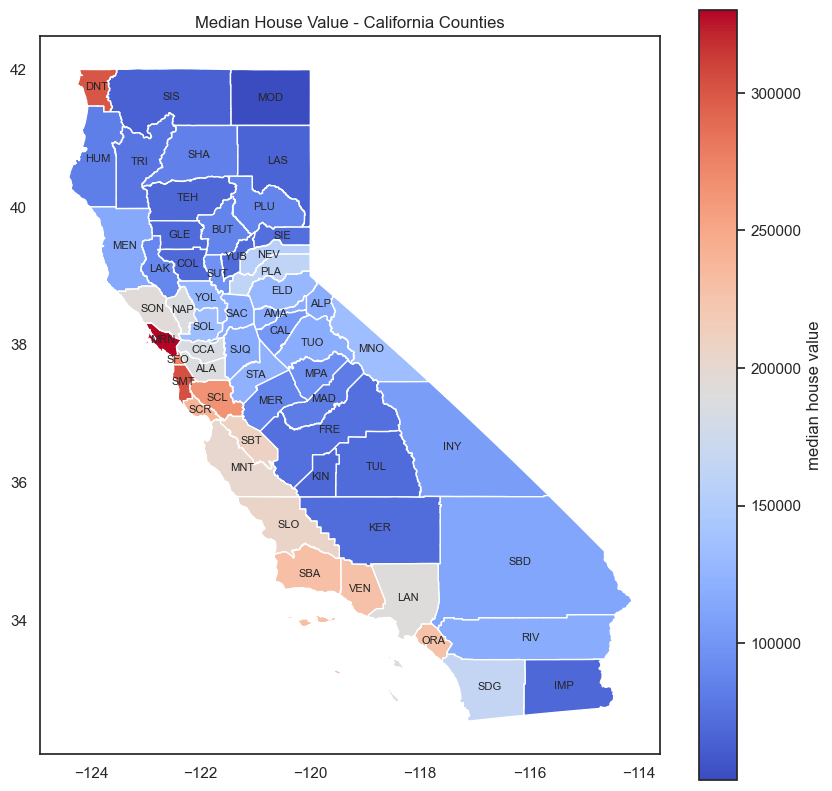

In [52]:
#agora que eu incorporei mais informações no meu gdf, eu posso deixar meu mapa mais interessante.
#now that I have incorporated more information into my gdf, I can make my map more interesting.

fig, ax = plt.subplots(figsize=(10, 10))

gdf_calif_counties.plot(
    ax=ax,
    column='median_house_value',
    cmap=PALETTE,
    legend=True,
    legend_kwds={'label': 'median house value', 'orientation':'vertical'}
    
)


for x,y, abbrev in zip(gdf_calif_counties['centroid'].x,  gdf_calif_counties['centroid'].y,  gdf_calif_counties['abbrev']):
    ax.text(x,y, abbrev, ha='center', va='center', fontsize=8)
  
ax.set_title('Median House Value - California Counties')

plt.show()

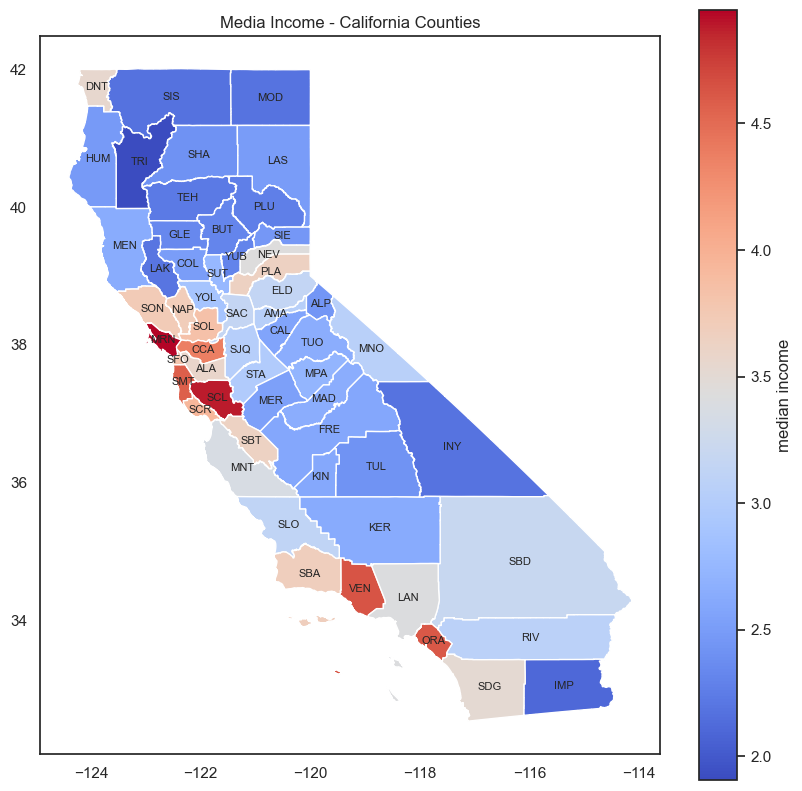

In [53]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf_calif_counties.plot(
    ax=ax,
    column='median_income',
    cmap=PALETTE,
    legend=True,
    legend_kwds={'label': 'median income', 'orientation':'vertical'}
    
)
 

for x,y, abbrev in zip(gdf_calif_counties['centroid'].x,  gdf_calif_counties['centroid'].y,  gdf_calif_counties['abbrev']):
    ax.text(x,y, abbrev, ha='center', va='center', fontsize=8)
  
ax.set_title('Media Income - California Counties')

plt.show()

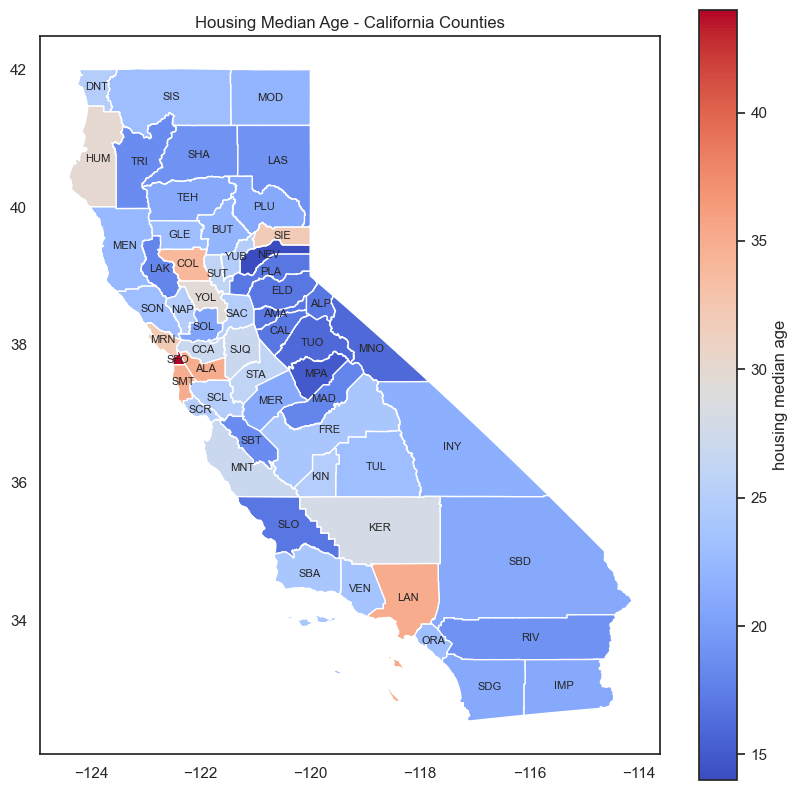

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf_calif_counties.plot(
    ax=ax,
    column='housing_median_age',
    cmap=PALETTE,
    legend=True,
    legend_kwds={'label': 'housing median age', 'orientation':'vertical'}
    
)
 

for x,y, abbrev in zip(gdf_calif_counties['centroid'].x,  gdf_calif_counties['centroid'].y,  gdf_calif_counties['abbrev']):
    ax.text(x,y, abbrev, ha='center', va='center', fontsize=8)
 
ax.set_title('Housing Median Age - California Counties')

plt.show()

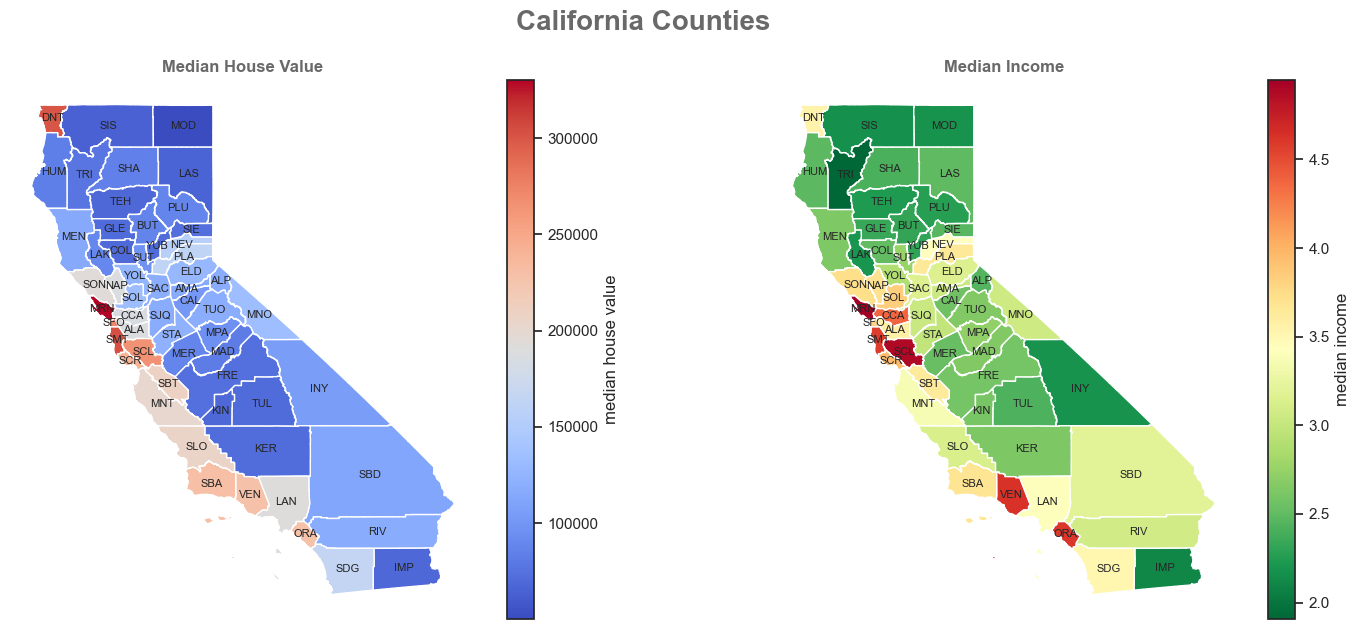

In [55]:
fig, axs = plt.subplots(1,2,  figsize=(18, 7))

gdf_calif_counties.plot(
    ax=axs[0],
    column='median_house_value',
    cmap=PALETTE,
    legend=True,
    legend_kwds={'label': 'median house value', 'orientation':'vertical'}
    
)

axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_frame_on(False)
 

gdf_calif_counties.plot(
    ax=axs[1],
    column='median_income',
    cmap='RdYlGn_r',
    legend=True,
    legend_kwds={'label': 'median income', 'orientation':'vertical'}
    
)


axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_frame_on(False)


for x,y, abbrev in zip(gdf_calif_counties['centroid'].x,  gdf_calif_counties['centroid'].y,  gdf_calif_counties['abbrev']):
    axs[0].text(x,y, abbrev, ha='center', va='center', fontsize=8)
    axs[1].text(x,y, abbrev, ha='center', va='center', fontsize=8)
    

fig.suptitle('California Counties', weight='bold', size=20, color='dimgrey')
axs[0].set_title('Median House Value', weight='bold', color='dimgrey')
axs[1].set_title('Median Income', weight='bold', color='dimgrey')


plt.show()


In [56]:
gdf_calif_counties.to_parquet(DADOS_GEO_MEDIAN)